## Pulsar datareductie
*Tammo Jan Dijkema, CAMRAS, 23 oktober 2017*

### Over dit notebook

Dit is een IPython notebook. Je kunt hem zelf uitvoeren door de bronversie en de gegevens te downloaden:
* [pulsar-datareductie.ipynb](pulsar-datareductie.ipynb)
* [B0329-clip.npy](B0329-clip.npy): gegevens van B0329+54 (172 Mb)
* [B0531a_sp-clip.npy](B0531a_sp-clip.npy): gegevens van de Krabpulsar B0531+21 (114 Mb)

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

De gegevens zijn opgenomen met de [Dwingeloo Radiotelescoop](http://www.camras.nl) op 20 oktober 2017 door een groep scholieren die een profielwerkstuk willen schrijven over o.a. de Krabpulsar. Deel van de opdracht was ook een pulsarwaarneming voor [Dwingeloo Live](http://www.astron.nl/onderwijs), het profielwerkstukprogramma van [CAMRAS](http://www.camras.nl) en [ASTRON](http://www.astron.nl).

Om de notebook op je eigen computer te draaien heb je nodig:
* Python
* Jupyter notebook
* Matplotlib en Numpy

Dit kun je installeren met bijvoorbeeld [Anaconda](https://www.continuum.io/downloads). Je kunt ook gewoon de resultaten uit dit notebook gebruiken; dan kun je niet zelf met de data spelen.

Het helpt als je een beetje python kan. Als je dat niet kan, wees dan niet bang om her en der een paar waarden aan te passen en te kijken wat er gebeurt.

Je kunt een commando uitvoeren door op **Shift-Enter** te drukken. Als je op *Alt-Enter* drukt, wordt de cel geëvalueerd en wordt een nieuwe cel ingevoegd.

Extra opmerking: voor de grote plaatjes hieronder kan `jupyter notebook` klagen over `IOPub data rate`. Om dat op te lossen kun je `jupyter` starten via `jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000`. 

Om te beginnen moeten er wat pakketten worden geladen:

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import numpy as np

We slaan vast de kanaalfrequenties (in MHz) alvast op:

In [2]:
frequencies = 441.668359375 - 35.0*np.arange(256)/256.0


### B0329+54 (de 'huispulsar')

In [3]:
data = np.load("B0329-clip.npy")

Deze data is al gecorrigeerd voor dispersie, en in losse pulsperiodes ingedeeld. Hiervoor zijn de volgende parameters gebruikt:

In [4]:
dm = 26.8644275665

In [5]:
period = 0.714486089554

In [6]:
date = "Fri Oct 20 09:09:29 CEST 2017"

Met deze periode en DM kunnen we de data over verschillende assen middelen.

In [7]:
data.shape

(687, 1, 256, 1024)

Deze dataset bevat 687 pulsperiodes, 1 polarisatie, 256 kanalen, met 1024 meetpunten per pulsperiode.

De totale integratietijd is ruim 8 minuten:

In [8]:
687 * period / 60.

8.1808657253933

We gaan nu deze dataset op verschillende manieren bekijken.
Bijvoorbeeld de data voor het derde kanaal van de eerste pulsperiode. Tellen begint voor computers altijd bij `0`, `:` betekent 'alle waarden':

In [9]:
data[0,0,140,:]

array([58, 61, 61, ..., 55, 65, 70], dtype=uint8)

Deze data kunenn we als volgt in een grafiek zetten:

In [10]:
times = np.linspace(0, period, data.shape[-1])

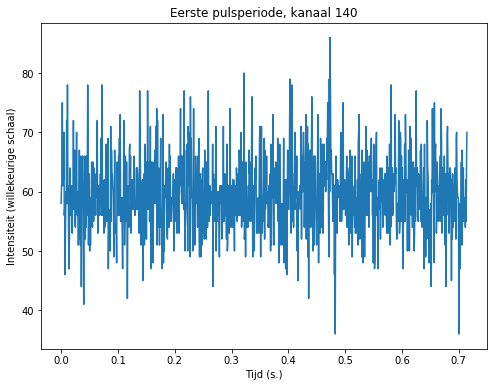

In [11]:
data_to_plot = data[0,0,140,:]

fig, ax = plt.subplots(1, figsize=(8,6));
ax.plot(times, data_to_plot);
ax.set_title("Eerste pulsperiode, kanaal 140");
ax.set_xlabel("Tijd (s.)");
ax.set_ylabel("Intensiteit (willekeurige schaal)");

We nemen nu het gemiddelde over alle frequenties, voor de eerste pulsperiode. Uit `data[0,0,:,:]` komt een array met twee assen, namelijk kanaal en meetnummer. Met `np.mean(..., axis=(0)` nemen we het gemiddelde over de eerste as (kanaal).

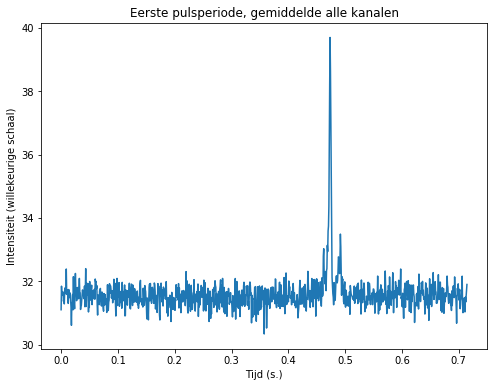

In [12]:
data_to_plot = np.mean(data[0,0,:,:], axis=0)

fig, ax = plt.subplots(1, figsize=(8,6));
ax.plot(times, data_to_plot);
ax.set_title("Eerste pulsperiode, gemiddelde alle kanalen");
ax.set_xlabel("Tijd (s.)");
ax.set_ylabel("Intensiteit (willekeurige schaal)");

We kunnen ook het gemiddelde over alle pulsperiodes nemen:

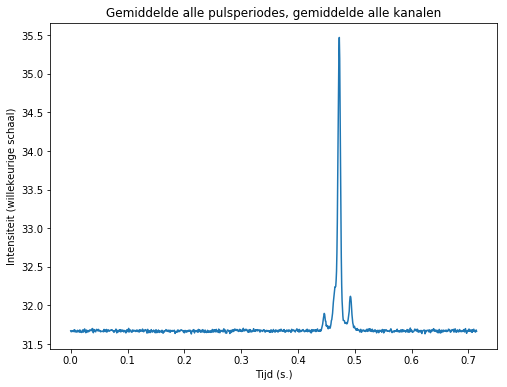

In [13]:
data_to_plot = np.mean(data[:,0,:,:], axis=(0,1))

fig, ax = plt.subplots(1, figsize=(8,6));
ax.plot(times, data_to_plot);
ax.set_title("Gemiddelde alle pulsperiodes, gemiddelde alle kanalen");
ax.set_xlabel("Tijd (s.)");
ax.set_ylabel("Intensiteit (willekeurige schaal)");

We kunnen ook de intensiteit weergeven als kleur, waardoor we de intensiteit per kanaal kunnen zien. We nemen het gemiddelde over alle pulsperiodes en alle polarisaties. Met `vmin` en `vmax` kun je het minimum en maximum van de kleurschaal instellen.

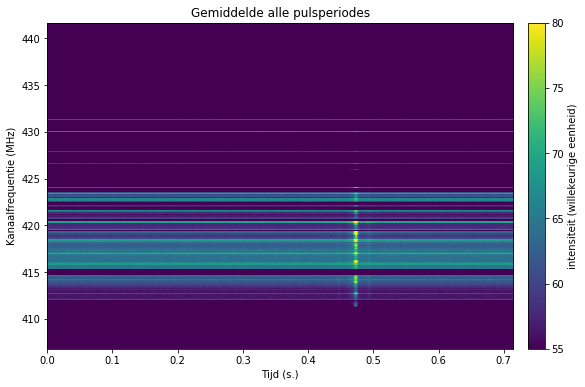

In [14]:
data_to_plot = np.mean(data, axis=(0,1));

fig, ax = plt.subplots(1, figsize=(9,6));
spectrumplot = ax.imshow(data_to_plot,
                         #cmap=cm.coolwarm, 
                         origin='upper', interpolation='nearest',
                         extent=([0, period, frequencies[-1], frequencies[0]]),
                         vmin=55, vmax=80
                         );
ax.set_aspect('auto')
ax.set_ylabel('Kanaalfrequentie (MHz)')
ax.set_xlabel('Tijd (s.)')
ax.set_title('Gemiddelde alle pulsperiodes')
cbar = fig.colorbar(spectrumplot,fraction=0.042, pad=0.03);
cbar.ax.set_ylabel('intensiteit (willekeurige eenheid)');

Je ziet hier de puls van de pulsar niet scheeft lopen over frequentie (zoals in Dwingeloo Live), omdat er al voor dispersie is gecorrigeerd.

Pulsar B0329 is zo helder, dat we zelfs in een individuele pulsperiode de puls kunnen zien, bijvoorbeeld de eerste.

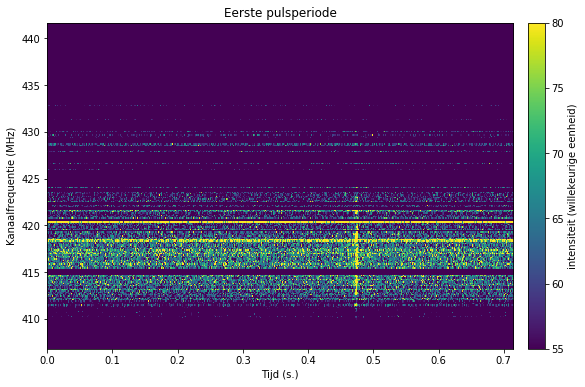

In [15]:
data_to_plot = data[0,0,:,:]

fig, ax = plt.subplots(1, figsize=(9,6));
spectrumplot = ax.imshow(data_to_plot,
                         #cmap=cm.coolwarm, 
                         origin='upper', interpolation='nearest',
                         extent=([0, period, frequencies[-1], frequencies[0]]),
                         vmin=55, vmax=80
                         );
ax.set_aspect('auto')
ax.set_ylabel('Kanaalfrequentie (MHz)')
ax.set_xlabel('Tijd (s.)')
ax.set_title('Eerste pulsperiode')
cbar = fig.colorbar(spectrumplot,fraction=0.042, pad=0.03);
cbar.ax.set_ylabel('intensiteit (willekeurige eenheid)');

We kunnen ook de pulsen over tijd laten zien:

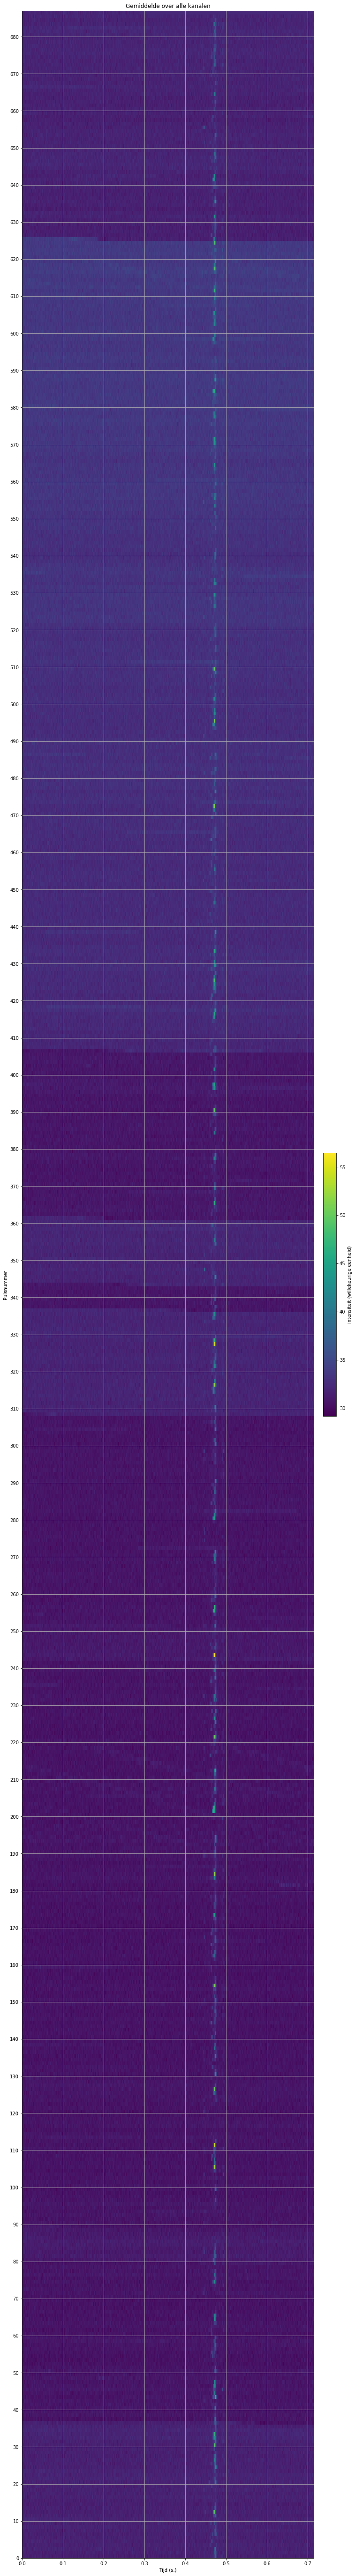

In [16]:
data_to_plot = np.mean(data,axis=(1,2))

fig, ax = plt.subplots(1, figsize=(12,100));
timeplot = ax.imshow(data_to_plot, #cmap=cm.PuRd, 
                         origin='lower', interpolation='nearest',
                         extent=([0, period, 0, data_to_plot.shape[0]])
                         );

ax.set_aspect('auto')
ax.set_ylabel('Pulsnummer')
ax.set_xlabel('Tijd (s.)')
ax.set_title('Gemiddelde over alle kanalen')
ax.set_yticks(np.arange(0, data_to_plot.shape[0], 10))
ax.grid()
cbar = fig.colorbar(timeplot, fraction=0.042, pad=0.03);
cbar.ax.set_ylabel('intensiteit (willekeurige eenheid)');

## Krabpulsar

Nu laden we de gegevens van de krabpulsar:

In [17]:
data = np.load("B0531a_sp-clip.npy")

In [18]:
data.shape

(14543, 1, 256, 32)

Voor de krabpulsar hebben we 14543 pulsperiode, voor 256 kanalen. Voor elke pulsperiode hebben we 32 meetpunten.

In [19]:
dm = 56.78466033935547

In [20]:
period = 0.033738448589527216

In [21]:
date = "Fri Oct 20 08:51:15 CEST 2017"

Let op: dit zijn niet noodzakelijk de periode en DM die het allerbest uit deze data blijken. Daarvoor zijn de PDFs van `pdmp` geschikter. Deze periode en DM zijn wel goed genoeg om de gegevens over verschillende assen te middelen.

Output van [pdmp](http://psrchive.sourceforge.net/manuals/pdmp/) voor verschillende waarnemingen van de krabpulsar:
* [pdmp_B0531+21_20171020_0651.pdf](pdmp_B0531+21_20171020_0651.pdf) (de waarneming van dit notebook)
* [pdmp_B0531+21_20171020_0722.pdf](pdmp_B0531+21_20171020_0722.pdf) extra waarneming een half uur later
* [pdmp_B0531+21_20170920_0714.pdf](pdmp_B0531+21_20170920_0714.pdf) een waarneming van een maand eerder

De totale integratietijd is weer iets meer dan 8 minuten:

In [22]:
14543 * period / 60.

8.177637630624906

Eerst maar eens kijken of we een pulsprofiel zien als we middelen over frequenties en over alle pulsperiodes:

In [23]:
times = np.linspace(0, period, data.shape[-1])

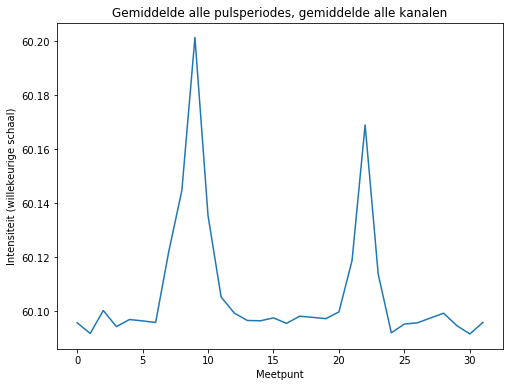

In [24]:
data_to_plot = np.mean(data[:,0,:,:], axis=(0,1))

fig, ax = plt.subplots(1, figsize=(8,6));
ax.plot(data_to_plot);
ax.set_title("Gemiddelde alle pulsperiodes, gemiddelde alle kanalen");
ax.set_xlabel("Meetpunt");
ax.set_ylabel("Intensiteit (willekeurige schaal)");

Gelukkig, we zien een grote puls en een kleine puls (de *interpuls*). Dat is het karakteristieke profiel van de Krabpulsar. We hebben maar 32 metingen per pulsperiode, dus we zien niet al te veel detail.

Als we niet middelen over alle pulsperiodes, dan zien we geen signaal meer:

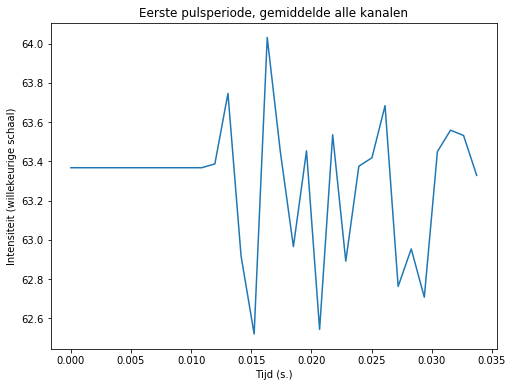

In [25]:
data_to_plot = np.mean(data[0,0,:,:], axis=0)

fig, ax = plt.subplots(1, figsize=(8,6));
ax.plot(times, data_to_plot);
ax.set_title("Eerste pulsperiode, gemiddelde alle kanalen");
ax.set_xlabel("Tijd (s.)");
ax.set_ylabel("Intensiteit (willekeurige schaal)");

Van de krabpulsar is bekend dat er af en toe *giant pulses* zijn: pulsen die wel 1000 keer helderder zijn dan de normale pulsen. Zo'n puls komt eens in de ca. 5 minuten langs; we kunnen kijken of we er een of meer gezien hebben. Omdat de *giant pulses* heel helder zijn, zouden we die wel moeten kunnen zien zonder te middelen over meerder pulsperiodes.

We laten weer het gemiddelde over kanalen zien, voor elk tijdslot.

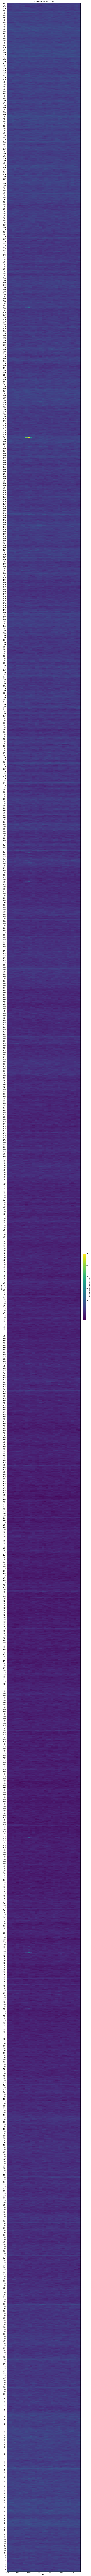

In [26]:
data_to_plot = np.mean(data,axis=(1,2))

fig, ax = plt.subplots(1, figsize=(12,400));
timeplot = ax.imshow(data_to_plot, #cmap=cm.PuRd, 
                     origin='lower', interpolation='nearest',
                     extent=([0, period, 0, data_to_plot.shape[0]]),
                     vmax=85
                    );

ax.set_aspect('auto')
ax.set_ylabel('Pulsnummer')
ax.set_xlabel('Tijd (s.)')
ax.set_title('Gemiddelde over alle kanalen')
ax.set_yticks(np.arange(0, data_to_plot.shape[0], 10))
#ax.grid()
cbar = fig.colorbar(timeplot, fraction=0.042, pad=0.03);
cbar.ax.set_ylabel('intensiteit (willekeurige eenheid)');

Er lijkt een *giant pulse* te zitten bij puls `12081`, en een paar kleinere bij `2442`, `3504`, `4155`, `6554`, `9810`, `11518`, `12065`. Bijzonder is wat er in puls `6817` te zien is: een heldere flits op de *interpuls* (de puls die normaal gesproken het kleinst is).

In [27]:
interestingpulses = (12081, 2442, 3504, 4155, 6554, 9810, 11518, 12065, 6817)

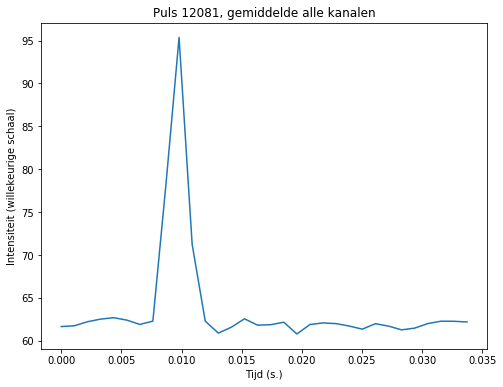

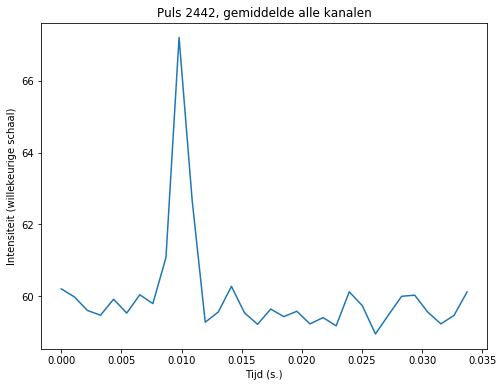

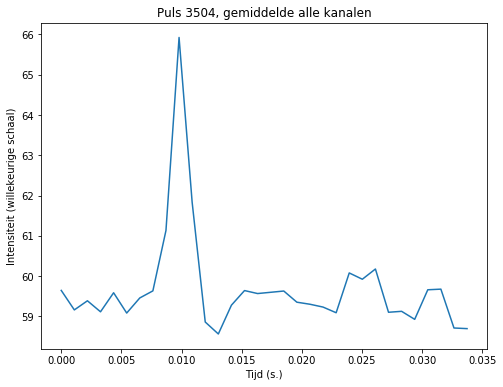

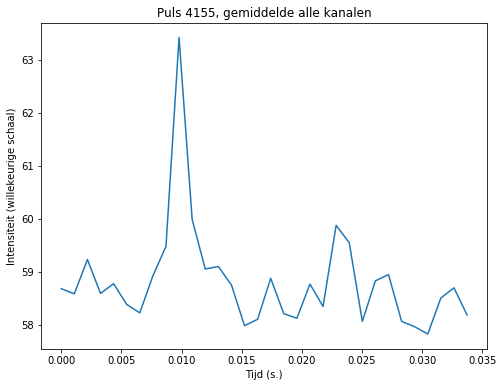

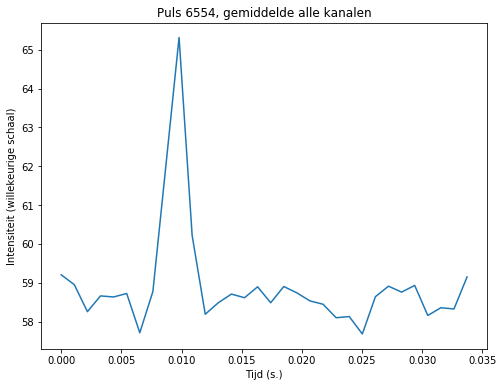

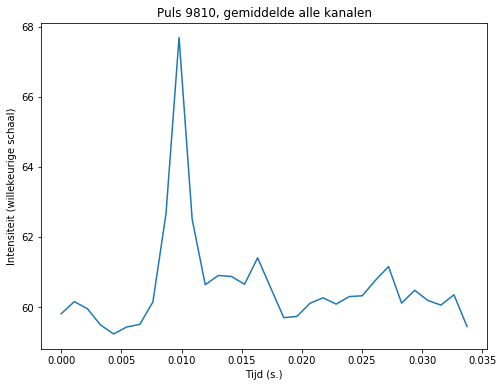

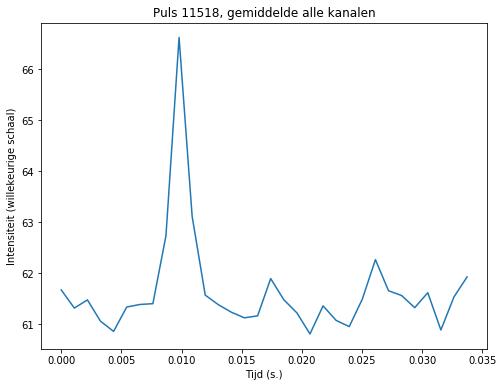

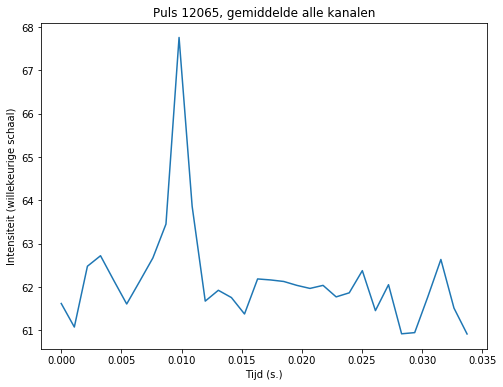

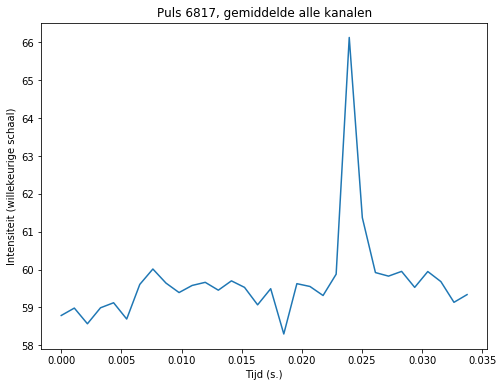

In [28]:
for pulsenumber in interestingpulses:
    data_to_plot = np.mean(data[pulsenumber,0,:,:], axis=0)

    fig, ax = plt.subplots(1, figsize=(8,6));
    ax.plot(times, data_to_plot);
    ax.set_title("Puls "+str(pulsenumber)+", gemiddelde alle kanalen");
    ax.set_xlabel("Tijd (s.)");
    ax.set_ylabel("Intensiteit (willekeurige schaal)");

De giant pulses zijn zelfs zo sterk, dat we ze in de losse kanalen ook zien.

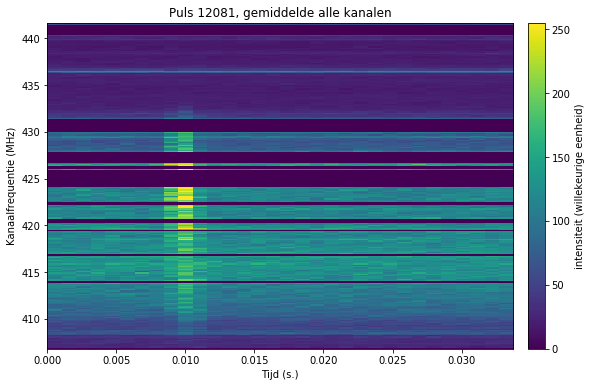

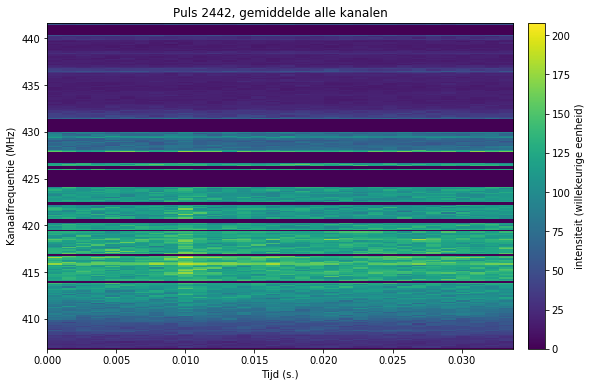

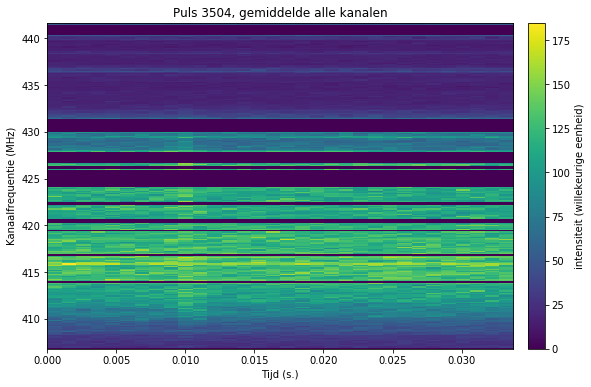

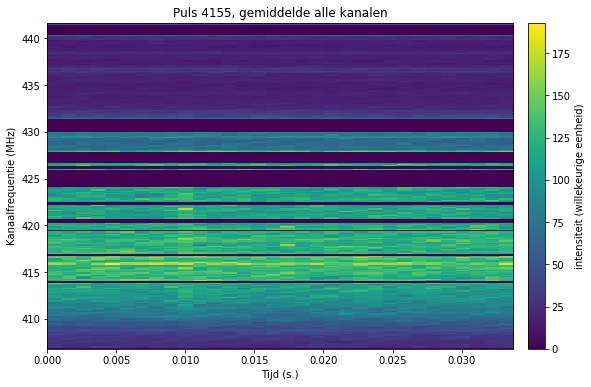

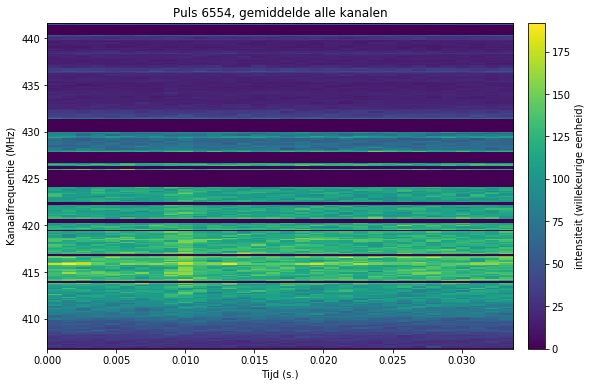

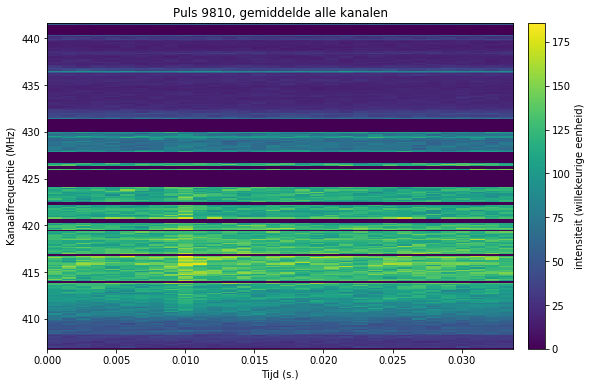

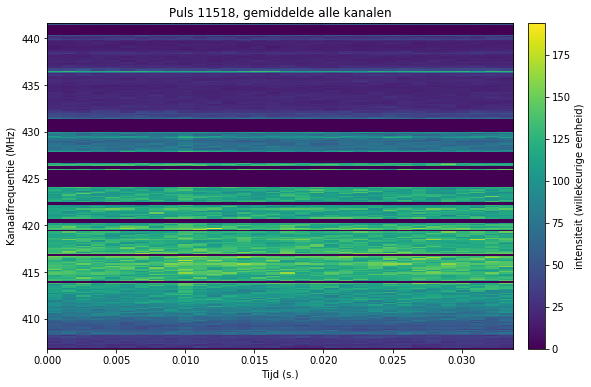

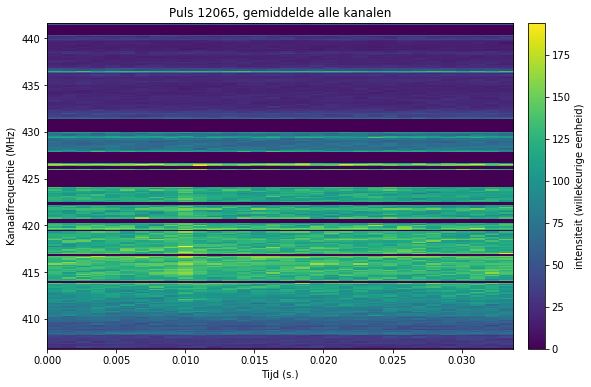

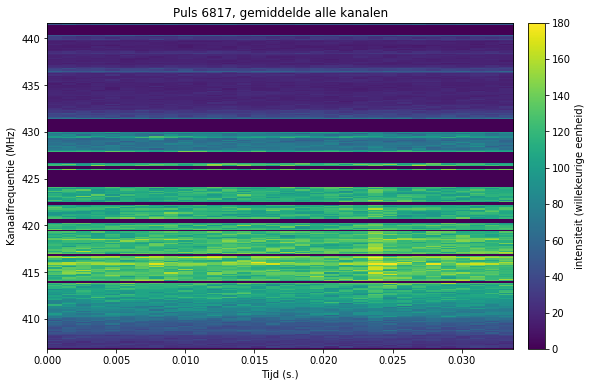

In [29]:
for pulsenumber in interestingpulses:
    data_to_plot = data[pulsenumber, 0, :, :]

    fig, ax = plt.subplots(1, figsize=(9,6));
    spectrumplot = ax.imshow(data_to_plot,
                             #cmap=cm.coolwarm, 
                             origin='upper', interpolation='nearest',
                             extent=([0, period, frequencies[-1], frequencies[0]])
                             );
    ax.set_aspect('auto')
    ax.set_ylabel('Kanaalfrequentie (MHz)')
    ax.set_xlabel('Tijd (s.)')
    ax.set_title("Puls "+str(pulsenumber)+", gemiddelde alle kanalen")
    cbar = fig.colorbar(spectrumplot, fraction=0.042, pad=0.03);
    cbar.ax.set_ylabel('intensiteit (willekeurige eenheid)');